In [5]:
import os
import sys
import wave
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

from scipy.io.wavfile import read


import scipy.io.wavfile
from scipy.fftpack import dct, idct
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

from AudioFunctions import *

In [2]:
root_dir = '/Volumes/TOSHIBA-21/H1-red/' #RS1/processed_audio/audio_downsampled/'

reference_noise = glob('/Users/maggie/Desktop/H1-red-Labeled_audio/RS*-noise/*_audio.wav')
reference_quiet = glob('/Users/maggie/Desktop/H1-red-Labeled_audio/all_hubs-quiet/*.wav')

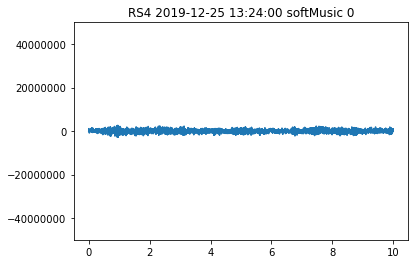

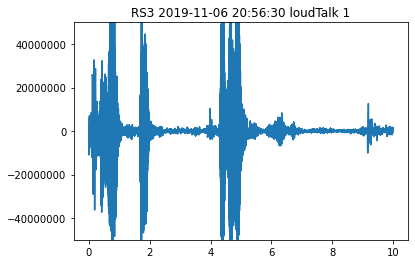

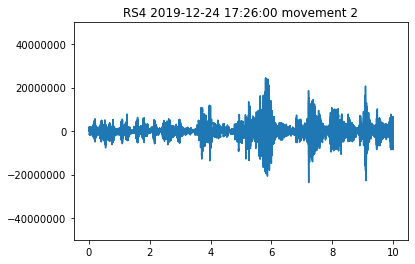

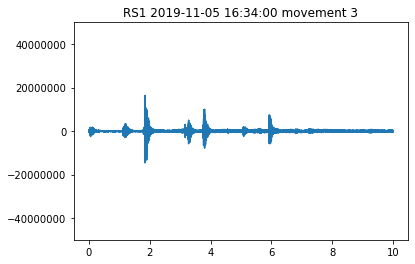

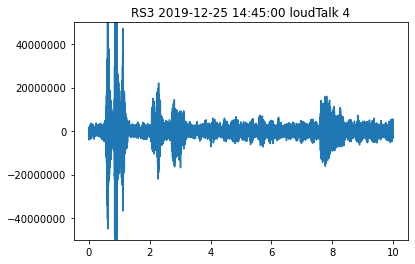

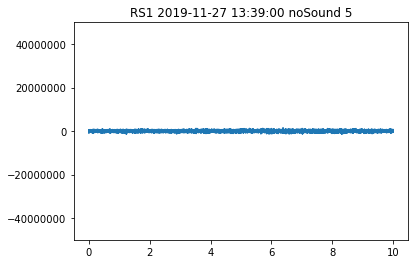

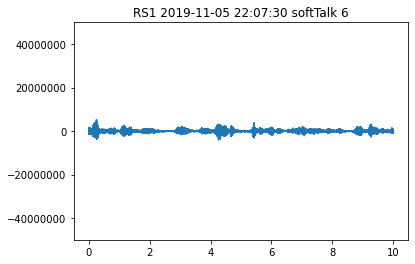

In [22]:
ybounds = (-50000000, 50000000)
def plot_wav(wav_file, title, fs=8000):
    input_data = read(wav_file)
    sig = input_data[1]
    signal = sig - np.mean(sig)

    time_axis = np.linspace(0, len(sig) / fs, num=len(sig))
    

    plt.figure(1)
    plt.ticklabel_format(style='plain')
    plt.plot(time_axis, signal)
    plt.ylim(ybounds)
#     plt.ylim(-5000000,5000000)
    plt.title(title)
    plt.show()
#     plt.savefig(f'/Users/maggie/Desktop/plot_audio_H6/{hub}_{name}_{occ}')




def plot_folder(folder):
    for noise_file in folder:
#         hub = noise_file.split("/")[-2].split("-")[0]
#         day, time = os.path.basename(noise_file).strip("_audio.wav").split(" ")
#         time = f'{time[0:2]}:{time[2:4]}:{time[4:6]}'
#         ftitle = f'{hub} {day} {time} {}'

        fname = os.path.basename(noise_file).strip('.wav').split('_')
        day, time = fname[0].split(' ')
        hub, action = fname[2], fname[3]
        time = f'{time[0:2]}:{time[2:4]}:{time[4:6]}'
        ftitle = f'{hub} {day} {time} {action}'

        plot_wav(noise_file, ftitle)
    
wav_dir = '/Users/maggie/Desktop/subset/' 
files = glob(os.path.join(wav_dir, '*.wav'))#[-2:]
inds = [3,4,6,7,8,14,15]

files = glob(os.path.join(wav_dir, 'smaller', '*.wav'))
plot_folder(files)

In [2]:
def get_title(f):
    fname = os.path.basename(f).strip('.wav').split('_')
    day, time = fname[0].split(' ')
    hub, action = fname[2], fname[3]
    time = f'{time[0:2]}:{time[2:4]}:{time[4:6]}'
    ftitle = f'{hub} {day} {time} {action}'
    return ftitle

def get_wav(wav_file, fs=8000):
    input_data = read(wav_file)
    sig = input_data[1]
    signal = sig - np.mean(sig)
    time_axis = np.linspace(0, len(sig) / fs, num=len(sig))
    title = get_title(wav_file)
    
    return time_axis, signal, title

In [2]:
def plot_wavs(f1, f2, fs=8000):
    print(f1, f2)
    x1, y1, t1 = get_wav(f1)
    x2, y2, t2 = get_wav(f2)
    plt.figure(1)
    plt.ticklabel_format(style='plain')
    plt.plot(x1, y1, label=t1.split(' ')[-1])
    plt.plot(x2, y2, label=t2.split(' ')[-1], alpha=0.6)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Signal Amplitude')
    
#     plt.ylim(ybounds)
    plt.ylim(-10000000,10000000)
    plt.legend()
#     plt.show()
    plt.tight_layout()
    plt.savefig(f'/Users/maggie/Desktop/plot_audio/H1-{t1.split(" ")[-1]}-{t2.split(" ")[-1]}')
    plt.clf()
    
# wav_dir = '/Users/maggie/Desktop/subset/' 


# files = sorted(glob(os.path.join(wav_dir, 'smaller', '*.wav')))
# fq = files[3]

# for f in files:
#     if fq != f:
#         plot_wavs(f, fq)

In [17]:
ps_type = {'ps': 'audio_dct', 'ds': 'audio_downsampled'}

def open_npz(noise_file, path, audio_type='ds'):
    home = os.path.basename(path).split('-')[0]
    hub, day, time, action = get_title(noise_file).split(' ')

    file = f'{day}_{str(time[0:2])}00_{hub}_{home}_{audio_type}.npz'
    npz = os.path.join(path, hub, 'processed_audio', ps_type[audio_type], day, file)
    data = np.load(npz)  

    filters = {i+1: [x[i] for x in data[time]] for i in range(len(data[time][0]))}

    return filters, action, audio_type
        
        

def plot_filters(f1, f2):
    filters1, action1, a_type = open_npz(f1, root_dir)
    filters2, action2, a_type = open_npz(f2, root_dir)
    fig = plt.figure(figsize=(25,15))
    
    for i in range(1,len(filters1)+1):
        ax = fig.add_subplot(4,4,i)
        y1 = filters1[i]
        y2 = filters2[i]
#         print(action1, a_type, len(y2), i)
        x = np.linspace(0, 10, num=len(y1))
        
        ax.ticklabel_format(style='plain')
        ax.plot(x, y1, label=action1, alpha=0.6)
        ax.plot(x, y2, label=action2, alpha=0.6)
        ax.set_title(f'filter {i}')

    plt.legend()
    fig.suptitle(f'H1 {action1}-{action2} {ps_type[a_type]}_from_npz', fontsize=20)
    plt.savefig(f'/Users/maggie/Desktop/plot_audio/H1-{action1}-{action2}-{a_type}_from_npz')    
    plt.clf()
    

    
    

           
root_dir = '/Volumes/TOSHIBA-21/H1-red'
wav_dir = '/Users/maggie/Desktop/subset/' 

# filters = open_npz(files[2], root_dir)

# plot_filters(files[2], files[3])

files = sorted(glob(os.path.join(wav_dir, 'smaller', '*.wav')))
fq = files[3]

for f in files:
    print(f)
    print(fq)
    if fq != f:
        plot_filters(f, fq)

/Users/maggie/Desktop/subset/smaller/2019-11-05 163400_audio_RS1_movement1.wav
/Users/maggie/Desktop/subset/smaller/2019-11-27 133900_audio_RS1_noSound.wav
/Users/maggie/Desktop/subset/smaller/2019-11-05 220730_audio_RS1_softTalk.wav
/Users/maggie/Desktop/subset/smaller/2019-11-27 133900_audio_RS1_noSound.wav
/Users/maggie/Desktop/subset/smaller/2019-11-06 205630_audio_RS3_loudTalk1.wav
/Users/maggie/Desktop/subset/smaller/2019-11-27 133900_audio_RS1_noSound.wav
/Users/maggie/Desktop/subset/smaller/2019-11-27 133900_audio_RS1_noSound.wav
/Users/maggie/Desktop/subset/smaller/2019-11-27 133900_audio_RS1_noSound.wav
/Users/maggie/Desktop/subset/smaller/2019-12-24 172600_audio_RS4_movement2.wav
/Users/maggie/Desktop/subset/smaller/2019-11-27 133900_audio_RS1_noSound.wav
/Users/maggie/Desktop/subset/smaller/2019-12-25 132400_audio_RS4_softMusic.wav
/Users/maggie/Desktop/subset/smaller/2019-11-27 133900_audio_RS1_noSound.wav
/Users/maggie/Desktop/subset/smaller/2019-12-25 144500_audio_RS3_lo

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

In [3]:
# import numpy as np
# from glob import glob
# import os

# import argparse
# import time
# import pandas as pd
# from datetime import datetime




# processed_audio, downsampled_audio, time_file = process_wav(wav_name, date_folder_path, minute)

In [6]:
# def process_wav(wav_name, date_folder_path, minute, fs=8000):

fs = 8000   # defined in process_wav function inputs
# fh = 1600 # not used, but keepping as a record

filter_banks = create_filter_banks()

number_of_filters = len(filter_banks)+1 # +1 for loww-pass (0~100hz that was not in filterbanks)
filter_start_index = [i for i in range(0,number_of_filters*5,5)]
increment = 80
num_final_datapoint = 1000
temp = np.asarray([i for i in range(num_final_datapoint)])*increment # [0, 80, 160,...]
filter_i_sampling_index = np.zeros((number_of_filters,num_final_datapoint))

for j in range(number_of_filters):
    filter_i_sampling_index[j] = temp + filter_start_index[j]

filter_i_sampling_index = np.transpose(filter_i_sampling_index)
filter_i_sampling_index = filter_i_sampling_index.astype(int)



def process_wav(wav_path, fs=8000, filter_type='ps', dct_axis=1, norm_axis=1, norm=True):
    
    
    hub, day, time, action = get_title(wav_path).split(' ')
    title = (hub, day, time, action)

    _, wav = scipy.io.wavfile.read(wav_path) # _ = fs
    audio_len_seconds = len(wav)/fs # length of audio clip in seconds
    assert (audio_len_seconds == 10.0)

    ## Process Audio
    processed_audio = np.zeros((int(len(wav)),number_of_filters)) # Placeholder

    temp = butter_lowpass_filter(wav, 100, fs, order=6) # low pass filter (first filter)
    temp -= np.mean(temp) # Mean Shift
    processed_audio[:,0] = abs(temp) # Full wave rectify

    for idx, Filter in enumerate(filter_banks):
        temp = butter_bandpass_filter(wav, Filter[0], Filter[1], fs, order=6) # Band pass filter
        processed_audio[:, idx+1] = abs(temp) # Full wave rectify

    ## Downsample:
    downsampled = np.zeros((num_final_datapoint,number_of_filters))

    for i in range(number_of_filters):
        downsampled[:,i] = processed_audio[filter_i_sampling_index[:,i],i]

    if filter_type == 'ds':
        params = 'ds'
        return downsampled, title, params

    else:
        processed_audio = dct(downsampled, axis=dct_axis) # Perform DCT across different filter on each timepoint
#         processed_audio_0 = dct(downsampled, axis=0) # Perform DCT across  time axis on different filter

        if norm:
            params = f'dct_axis_{dct_axis}, norm_axis_{norm_axis}'

#         processed_audio = processed_audio[:,:12] # Keep only first 12 coefficients
            processed_audio = scale(processed_audio,axis=norm_axis) # Normalizing/Scaling to zero mean & unit std      ?? Look into this                 
        ################################################################
        else:
            params = f'dct_axis_{dct_axis}, norm_{norm}'
        
        return processed_audio, title, params



# wav_dir = '/Users/maggie/Desktop/subset/' 
# files = sorted(glob(os.path.join(wav_dir, 'smaller', '*.wav')))

# for f in files:
#     ps, tf = process_wav(f, filter_type='ds')
#     print(np.shape(ps))
    

In [30]:
x = np.ones((3,5))
print(len(x))
print(len(x[0]))
print(x)

3
5
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [33]:
x = np.random.rand(10,3)
print(x)
y = dct(x, axis=0)
print(y)
z = dct(x, axis=1)
print(z)

[[0.48200574 0.35578829 0.61696161]
 [0.62387772 0.04171255 0.09441704]
 [0.36980503 0.16389441 0.0118257 ]
 [0.26500104 0.79013086 0.9141818 ]
 [0.63766441 0.85122853 0.97241451]
 [0.82421723 0.48361023 0.74864426]
 [0.38436396 0.50047599 0.93939669]
 [0.74012953 0.17809238 0.8092089 ]
 [0.27265616 0.07398094 0.5804534 ]
 [0.22905489 0.39794412 0.4483505 ]]
[[ 9.65755142  7.67371658 12.27170883]
 [ 0.43509083  0.21716219 -1.6136067 ]
 [-1.13758199 -2.48652345 -2.63295868]
 [ 1.4895391  -0.97110698  1.12270141]
 [ 0.34060724  1.82626414  1.30370622]
 [-0.04788803  0.93562064  2.33428113]
 [-1.35278618  1.55168651  1.4711595 ]
 [-0.69274363 -0.55909001 -0.42112003]
 [ 1.06150437 -0.30066021 -0.72697521]
 [-0.91928577  0.20604673 -0.14664137]]
[[ 2.90951126 -0.23375043  0.38739077]
 [ 1.52001463  0.91705279  0.63486966]
 [ 1.0910503   0.62003839  0.05384191]
 [ 3.93862741 -1.12441405 -0.40107888]
 [ 4.92261489 -0.57980419 -0.09237814]
 [ 4.11294343  0.13089622  0.60564103]
 [ 3.64847328 

In [16]:
wav_dir = '/Users/maggie/Desktop/subset/' 
files = sorted(glob(os.path.join(wav_dir, 'smaller', '*.wav')))

for dct_axis in [0,1]:
    for norm in [True, False]:
        if norm == True:
            for norm_axis in [0,1]:
                plot_filters_from_wav(files[0], files[3], atype='ps', dct_axis=dct_axis, norm_axis=norm_axis, norm=norm)
        else:
            plot_filters_from_wav(files[0], files[3], atype='ps', dct_axis=dct_axis, norm_axis=norm_axis, norm=norm)
                

dct_axis_0, norm_axis_0
dct_axis_0, norm_axis_1
dct_axis_0, norm_False
dct_axis_1, norm_axis_0
dct_axis_1, norm_axis_1
dct_axis_1, norm_False


<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

In [20]:
# dct_axis=1, norm_axis=1, norm=True

def plot_filters_from_wav(f1, f2, atype, dct_axis=1, norm_axis=1, norm=True):
    
    data1, title1, params1 = process_wav(f1, filter_type=atype, dct_axis=dct_axis, norm_axis=norm_axis, norm=norm)
    data2, title2, params2 = process_wav(f2, filter_type=atype, dct_axis=dct_axis, norm_axis=norm_axis, norm=norm)
    
    print(len(data1))
#     if params1 != params2:
#         print('mismatched parameters')
#         return
#     else:
#         params = params1
#         filters1 = {i+1: [x[i] for x in data1] for i in range(len(data1[0]))}
#         filters2 = {i+1: [x[i] for x in data2] for i in range(len(data2[0]))}
#         print(params)

#         fig = plt.figure(figsize=(25,15))

#         for i in range(1,len(filters1)+1):
#             ax = fig.add_subplot(4,4,i) #downsampled 16 filters
#     #         ax = fig.add_subplot(4,3,i) #processed 12 filters

#             y1 = filters1[i]
#             y2 = filters2[i]


#             x = np.linspace(0, 10, num=len(y1))

#             ax.ticklabel_format(style='plain')
#             ax.plot(x[10:], y1[10:], label=f'{title1[0]}-{title1[3]}', alpha=0.6)
#             ax.plot(x[10:], y2[10:], label=f'{title2[0]}-{title2[3]}', alpha=0.6)
#             ax.set_title(f'filter {i}')
#     #     fig.show()

#         plt.legend()
#         fig.suptitle(f'H1 {title1[3]}-{title2[3]} {atype} {params}', fontsize=20)
#         plt.savefig(f'/Users/maggie/Desktop/plot_audio/H1-{title1[3]}-{title2[3]}-{params}')    
#         plt.clf()
   
    
plot_filters_from_wav(files[0], files[3], atype='ds', dct_axis=0, norm=False)

1000


ds


<Figure size 1800x1080 with 0 Axes>

In [35]:
open_npz(reference_noise[0:1])


/Volumes/TOSHIBA-21/H1-red/RS2/processed_audio/audio_dct/2019-12-24/2019-12-24_1400_RS2_H1_ps.npz
1000
1000


In [2]:
def get_extrema(audio_dir):
    mins, maxs, means = [], [], []
    for wav_file in audio_dir:
        input_data = read(wav_file)
        signal = input_data[1]
        a = np.mean(signal)
        means.append(a)
        mins.append(min(signal)-a)
        maxs.append(max(signal)-a)
        

    print('mean, min, max')
    print('min', int(np.mean(mins)), int(min(mins)), int(max(mins)))
    print('max', int(np.mean(maxs)), int(min(maxs)), int(max(maxs)))
    print('mean', int(np.mean(means)), int(min(means)), int(max(means)))
    return mins, maxs, means

all_hubs 2019-11-06 00:06:00


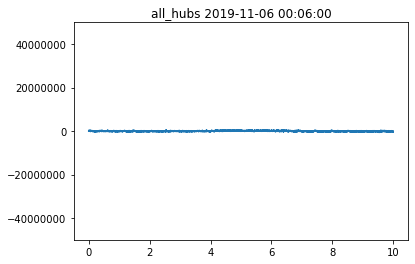

all_hubs 2019-11-06 00:09:10


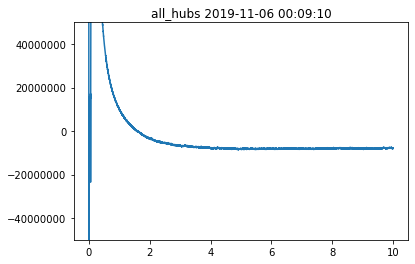

all_hubs 2019-11-06 01:16:00


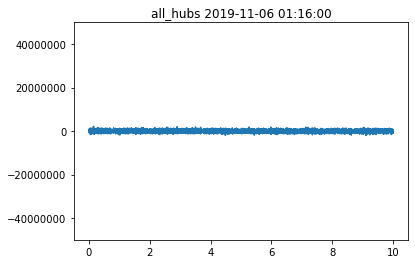

all_hubs 2019-11-17 06:22:10


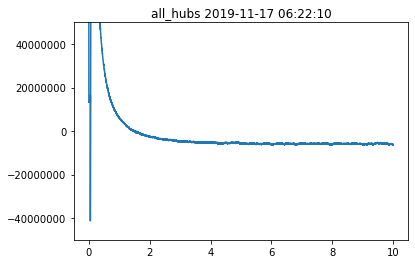

all_hubs 2019-11-24 06:34:00


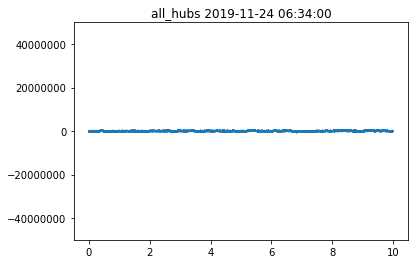

all_hubs 2019-11-26 07:31:00


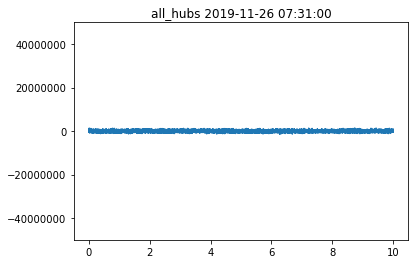

all_hubs 2019-11-27 00:33:00


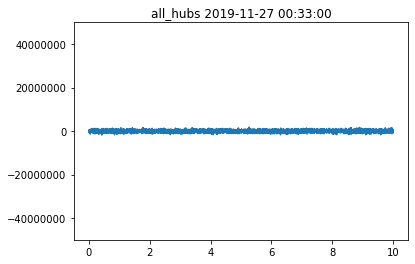

all_hubs 2019-11-27 13:39:00


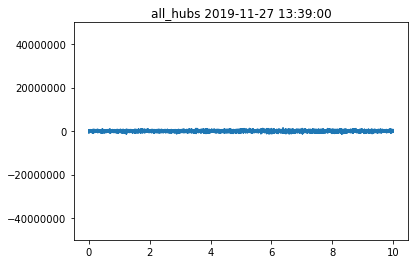

all_hubs 2019-12-24 00:05:00


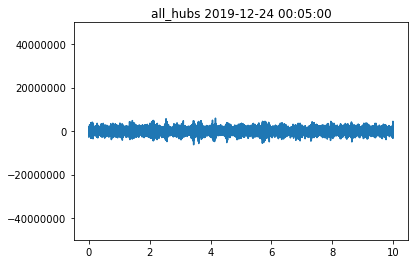

all_hubs 2019-12-24 02:17:00


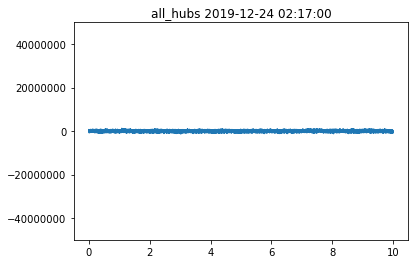

all_hubs 2019-12-24 04:53:00


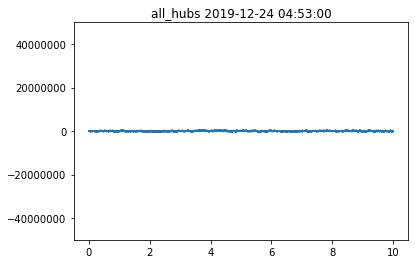

all_hubs 2019-12-24 05:15:20


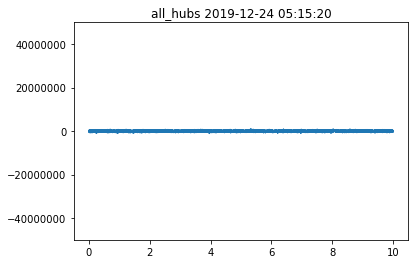

all_hubs 2019-12-24 07:56:10


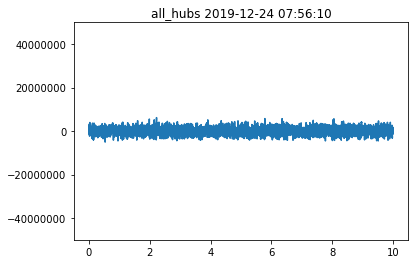

all_hubs 2019-12-24 09:06:20


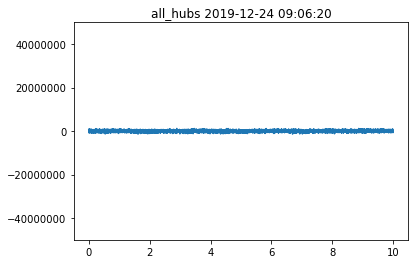

all_hubs 2019-12-25 09:35:00


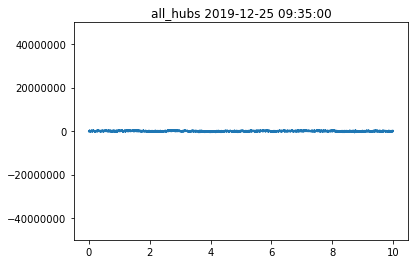

In [10]:
plot_folder(sorted(reference_quiet))

In [11]:

f = sorted(reference_noise)[0]





/Users/maggie/Desktop/H1-red-Labeled_audio/RS1-noise/2019-11-05 163400_audio.wav


/Users/maggie/Desktop/H6-black_labeled_audio/BS3/audio_noise/2019-10-10 010530_audio.wav
8000
[0.00000000e+00 1.25015627e-04 2.50031254e-04 ... 9.99749969e-01
 9.99874984e-01 1.00000000e+00]


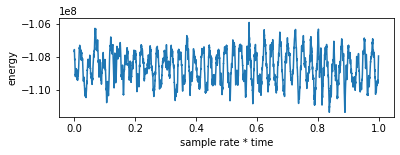

In [36]:
audio_dir_noise = '/Users/maggie/Desktop/H6-black_labeled_audio/BS3/audio_noise/*.wav'
audio_dir_quiet = '/Users/maggie/Desktop/H6-black_labeled_audio/BS3/audio_quiet/*.wav'


noise_files = glob(audio_dir_noise)
quiet_files = glob(audio_dir_quiet)


n1 = noise_files[0]
q1 = quiet_files[0]

print(n1)
spf = wave.open(n1, 'r')

# signal = spf.readframes(-1)
# signal = np.fromstring(signal, 'Int16')

signal_wave = wave.open(n1, 'r')
sample_rate = 8000
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype='int32')
fs = spf.getframerate()
print(fs)
time_axis = np.linspace(0, len(sig) / fs, num=len(sig))
print(time_axis)

plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(time_axis, sig)

plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plt.show()
# plt.figure(1)
# plt.title('signal wave')
# plt.plot(signal)
# plt.show()

noise
61.472768 -108.59697766400001
107.06944 -108.7093798912
80.36352 -108.7669848064
84.803584 -108.6857672704
72.9088 -108.7340658688
58.392576 -108.81828003839999

no noise
9.125888 -108.545036288
54.247424 -108.59716403200001
5.07904 -108.5392734208
57.42592 -108.54850621439999
20.80768 -108.5602701312
6.668288 -108.567163904


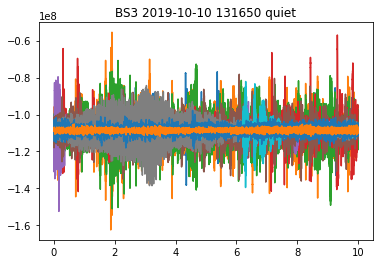

In [88]:
from scipy.io.wavfile import read


def plot_audio(audio_file):
    name = os.path.basename(audio_file).strip('_audio.wav')
    hub = audio_file.split('/')[-3]
    occ = audio_file.split('/')[-2].strip('audio_')
    
    input_data = read(audio_file)
    sig = input_data[1]
    
    M = max(sig)
    m = min(sig)
    a = np.mean(sig)
    

    time_axis = np.linspace(0, len(sig) / fs, num=len(sig))

    plt.figure(1)
#     plt.ticklabel_format(style='plain')
    plt.plot(time_axis, sig)
    title = f'{hub} {name} {occ}'
    plt.title(title)
    plt.savefig(f'/Users/maggie/Desktop/plot_audio_H6/{hub}_{name}_{occ}')
    
    return M, m, a, title
#     plot_a.set_xlabel('time')
#     plot_a.set_ylabel('energy')
#     plot_a = plt.subplot(211)
# #     plot_a.ticklabel_format(style='plain')
#     plot_a.plot(time_axis, sig)
#     plot_a.set_xlabel('time')
#     plot_a.set_ylabel('energy')

#     plot_b = plt.subplot(212)
#     plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
#     plot_b.set_xlabel('Time')
#     plot_b.set_ylabel('Frequency')



# plt.specgram(audio, NFFT=1024, Fs=sample_rate, noverlap=900)
# # plt.set_xlabel('Time')
# # plt.set_ylabel('Frequency')
# plt.show()

max_noise = np.nan
min_noise = np.nan
print('noise')
for f in noise_files:
    M, m, a, title = plot_audio(f)
    print((M-m)/1000000, a/1000000)#, title)
print('\nno noise')
for f in quiet_files:
    M, m, a, title = plot_audio(f)
    print((M-m)/1000000, a/1000000)#, title)

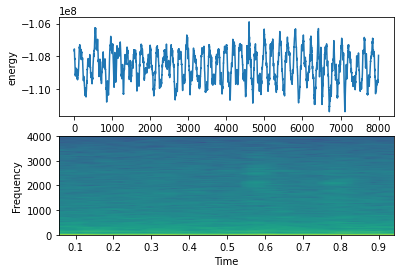

In [49]:
import wave
import numpy as np
import matplotlib.pyplot as plt

signal_wave = wave.open(n1, 'r')
sample_rate = 8000
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int32)


# left, right = sig[0::2], sig[1::2]


plt.figure(1)

plot_a = plt.subplot(211)
plot_a.plot(sig)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plot_b = plt.subplot(212)
plot_b.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()